In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
from sklearn.datasets import make_classification
from utils import generate_data, plot_predictions, plot_svc_decision_function

### In this pracitcal session we will explore several classification  models. But first, as usual, let's generate and plot some training and testing data. 


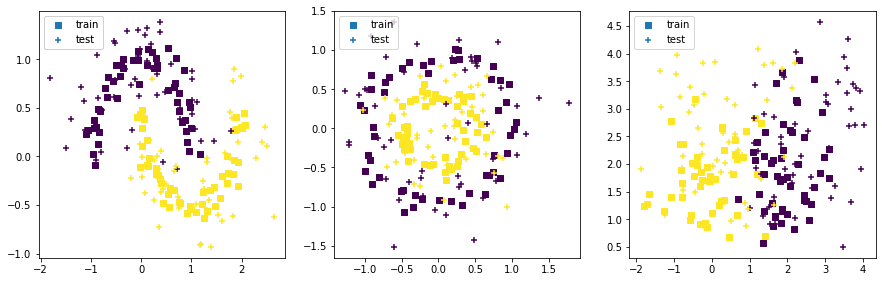

In [2]:
datasets_train, datasets_test = generate_data()
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2, 3, 1)
ax1.scatter(datasets_train[0][0][:,0],datasets_train[0][0][:,1], c=datasets_train[0][1], marker="s", label='train')
ax1.scatter(datasets_test[0][0][:,0],datasets_test[0][0][:,1], c=datasets_test[0][1], marker="+", label='test')
legend1 = ax1.legend(loc="upper left")
ax1.add_artist(legend1)

ax2 = fig.add_subplot(2, 3, 2)
ax2.scatter(datasets_train[1][0][:,0],datasets_train[1][0][:,1], c=datasets_train[1][1], marker="s", label='train')
ax2.scatter(datasets_test[1][0][:,0],datasets_test[1][0][:,1], c=datasets_test[1][1], marker="+",  label='test')
ax2.legend(loc='upper left');

ax3 = fig.add_subplot(2, 3, 3)
ax3.scatter(datasets_train[2][0][:,0],datasets_train[2][0][:,1], c=datasets_train[2][1], marker="s", label='train')
ax3.scatter(datasets_test[2][0][:,0],datasets_test[2][0][:,1], c=datasets_test[2][1], marker="+",  label='test')
ax3.legend(loc='upper left');


## 1. Linear Classification

#### 1.1. Linear least squares for classification

In the previous practical session we explored how to tune a linear regression using least-squares loss function. We saw that minimization of the least-squares loss function led to a simple closed-form solution. As discussed in class, similar idea can also be applied to the classification task, with the difference that now we additionally requiere a decision rule for classification.

As discussed in class, let the decision rule be simply $sign(y(x))$, where $y(x) = W^Tx$ is our discriminant function. Thus, such a classifier will return class 0 for all the points lying on one side of the decision boundary and 1 for the ones lying on the other side. Lets implememnt this simple classifier.

In [3]:
#least squares for classification
def train_LSC(X, Y):
    #Note: we transform the labels from {0,1} to {-1,+1}
    Y = (ds_train[1]*2)-1
    
    #calculate the discriminant function parameters
    W = np.linalg.inv(X.T @ X) @ (X.T @ Y.reshape(100,1))
    return W

def calculate_decision_boundary(W):
    line_x = np.linspace(-10,10) # <- this would give x1;
    #the goal is to calculate x2 given x1 and the weights
    
    line_y = (-W[0] - W[1]*line_x) / W[2] #TODO <- cpomplete this line
    return line_x, line_y

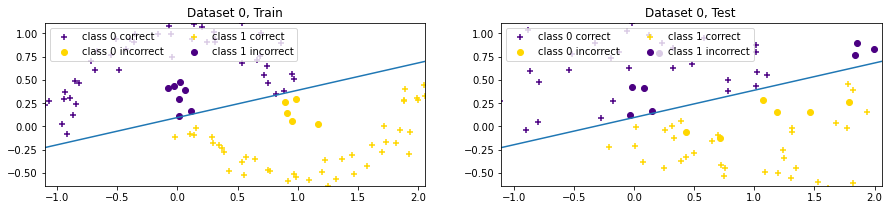

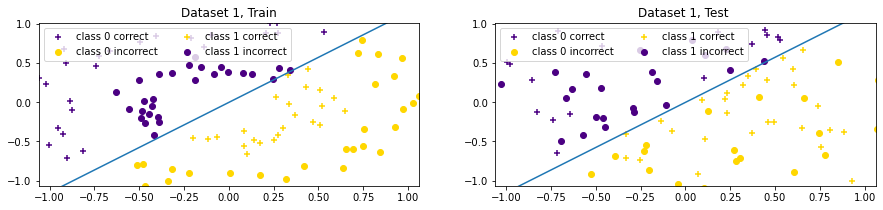

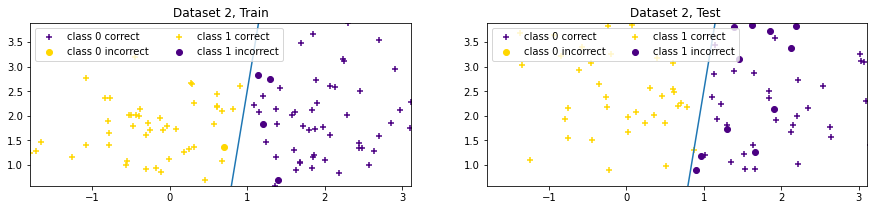

In [4]:
for i, (ds_train, ds_test) in enumerate(zip(datasets_train, datasets_test)):
    ds_train = datasets_train[i]
    ds_test = datasets_test[i]

    X = ds_train[0]
    #Add a column of ones to account for the bias term
    X_b = np.array([np.ones(len(X)), X[:,0], X[:,1]]).T
    ####
    Y = ds_train[1]
    X_test = ds_test[0]

    #Add a column of ones to account for the bias term
    X_test_b = np.array([np.ones(len(X_test)), X_test[:,0], X_test[:,1]]).T
    ###

    Y_test = ds_test[1]

    # 1) train weights
    #let k be the number of casses (2), dim - dimentionality of the data (2)
    W = train_LSC(X_b, Y) # dim x k

    # 2) Calculate the discriminant function and predict 
    # a) for test data
    y_x = np.dot(W.T, X_test_b.T)
    pred_test = 1*(y_x>0)[0]

    # b) for training data
    y_x = np.dot(W.T, X_b.T)
    pred_train = 1*(y_x>0)[0]

    
    # 3) Calculate decision boundary
    line_x, line_y = calculate_decision_boundary(W)
    
    
    # 4) plot predictions
    plot_predictions(i,X,Y, X_test, Y_test, pred_train, pred_test, line_x, line_y)

**Question 1:** for which dataset does the model achieve the best performance? Explain in your own words, why this is the case.

**Question 2:** complete the **"calculate_decision_boundary"** function above to produce the decision boundary for the classifiers. Rerun the cell above to see of the computed decision boundary makes sense.

Hint:
1. Set up the discriminant function: $y(\vec{x}) = W^T\vec{x}$.  
2. What is the decision rule? (i.e. which output of the discrimnant function would imply "uncertainty")?
3. Solve for $x_2$


#### 1.2. SVM

Here we will use the sklearn library for the first time. We will train and evaluate a Suport Vector Machine (SVM) model, whih was brefly touched upon in the class.

First, lets generate some clearly linearly seperable data.

(-0.5, 2.2)

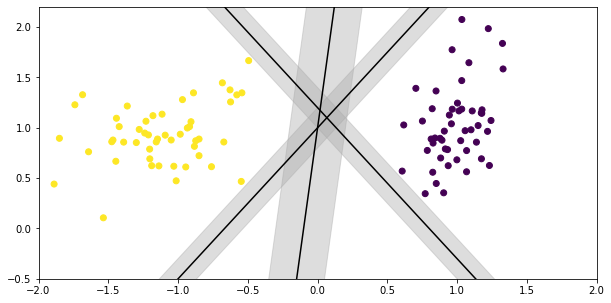

In [5]:
#lets load the linearly seperable dataset
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                               random_state=1, n_clusters_per_class=1)
fig = plt.figure(figsize = (10,5))
xfit = np.linspace(-2, 2)
plt.scatter(X[:, 0], X[:, 1], c=Y)

for m, b, d in [(1.5, 1, 0.2), (10, 1, 2), (-1.5, 1.2, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
plt.xlim(-2,2)
plt.ylim(-0.5,2.2)

We see that there axist many decision boundaries can be used to seperate the given dataset.

SVM choses the line that maximizes the margin to the closest point. Let's use sklearn to train an SVM model and visualize the results.

In [6]:

#import the SVM classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)

#lets fit the model (learn its parameters)
model.fit(X, Y)

SVC(C=10000000000.0, kernel='linear')

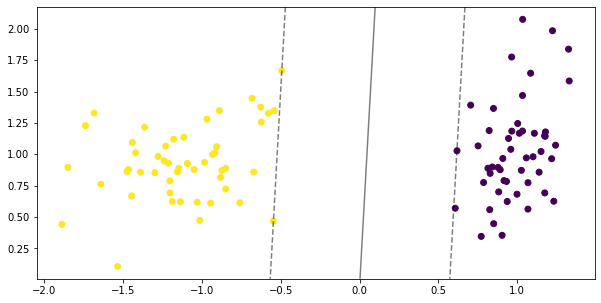

In [7]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c = Y)
ax = plot_svc_decision_function(model,ax)

We see that algorithm has chosen the decision boundary with the maximal margin. Here, the pivot elements that touch the (dotted) margins are called support vectors.

Lets now try to classify our linearly seperable dataset from before using SVM.

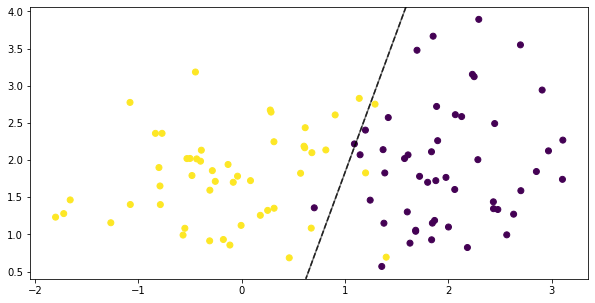

In [9]:
X, Y = datasets_train[2]

# create an sklearn model object
model = SVC(kernel='linear', C=1E10)

#lets fit the model (learn its parameters)
model.fit(X, Y)


fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plot_svc_decision_function(model,ax)

We can see that in our linearly seperable dataset, the datapoints from the two calsses overlap and there is no perfect decision boundary for our SVM model.

We can also see that for the classifier (decision boundary) depicted in the above graph no margin is visualized, as there are no suport vectors that can setisfy the 'hard margin' condition.

To deal with the overlapping datasets, a 'soft-margin' version of the SVM can be implemented varying the regularization strength applied during the training. This would allow some points to enter the margin, leading to a better fit.

**Question SVM:** check the documentation of the sklearn SVM classifier [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Try to find the parameter that would control the regularization strength and change it in the cell above to implement a "soft-margin" SVM. Rerun the cell to visualize the result.


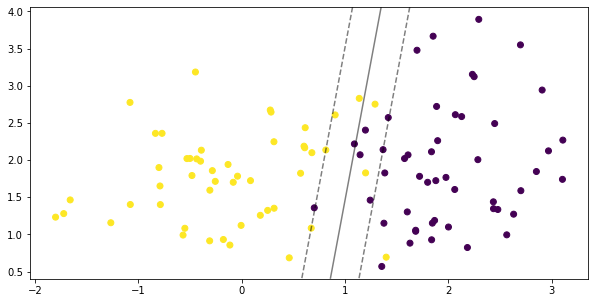

In [11]:
X, Y = datasets_train[2]

# create an sklearn model object
model = SVC(kernel='linear', C=10)

#lets fit the model (learn its parameters)
model.fit(X, Y)


fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plot_svc_decision_function(model,ax)

Now, let's run the SVM classifier on all the 3 datasets (*Note: please complete the previous question first, otherwise this will run for to long*).

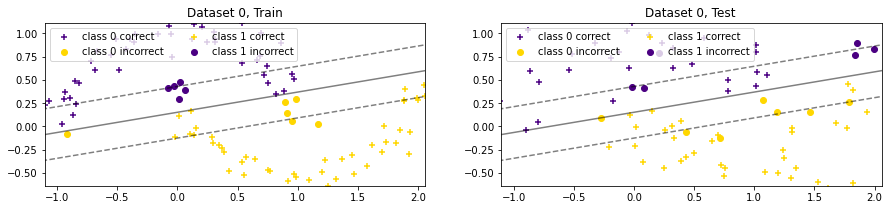

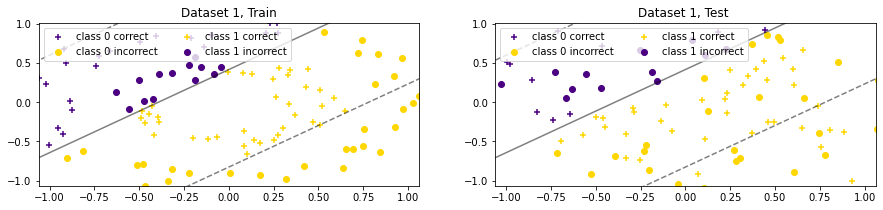

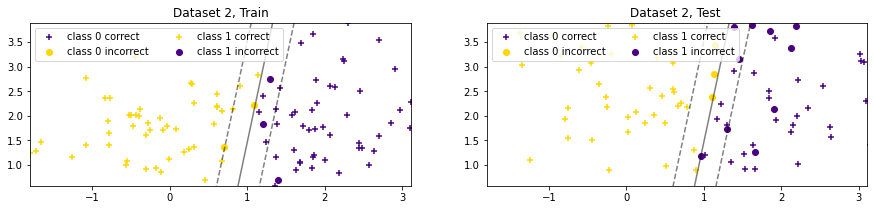

In [12]:
for i, (ds_train, ds_test) in enumerate(zip(datasets_train, datasets_test)):
    ds_train = datasets_train[i]
    ds_test = datasets_test[i]

    X = ds_train[0]
    Y = ds_train[1]
    
        
    X_test = ds_test[0]
    Y_test = ds_test[1]
    # 1) train weights
    #lets fit the model (learn its parameters)
    #we use the model form the cell above
    model.fit(X, Y)

    # 2) Calculate the discriminant function and predict 
    # a) for test data
    pred_test = model.predict(X_test)

    # b) for training data
    y_x = np.dot(W.T, X_b.T)
    pred_train = model.predict(X)

    
    # 4) plot predictions
    plot_predictions(i,X,Y, X_test, Y_test, pred_train, pred_test, plot_svm=model)

## 2. Probabilistic Models

#### 2.1. Naive Bayes 

Most of the previously seen classifiers were coming up with a linear decision boundary. Here we will implement the Naive Bayes classifier, that was extensively discussed in class, and see if this classifier can come up with better decision boundaries.

In our toy datasets, the target variables $y \in \{0,1 \}$ are catagorical, and hence, can be modeled with a *Categorical* distribution $p(y=k|\pi_k)$. Our feature variables $x \in \mathbb{R}^2$ are continuous variables. As discussed in the class, we can model continuous variables with a Gaussian distribution $\mathcal{N}(x_j | \mu_{jk}, \sigma^2_{jk})$.


**Question**: in the following the fitting procedure for a Naive Bayes classifier is described. Fill in the gaps with missing text (double-click on this cell to be able to edit in the text).
    
   1. Calculate MLE estemates for all the parameters of our distributions: 
     $\theta \in \{$<font size="2" color='red'> $  \sigma^2_{jk}, \mu_{jk}, \pi_k   $ </font> \} using the training set.
   2. Use the estimated parameters and the <font size="2" color='red'> Bayes  </font> theorem to make predictions. The corresponding formula is:
   
   $posterior  \propto join = class\space conditional * class\space prior$
   
   $P(y = k|x) \propto$  <font size="2" color='red'> P(y = k, x) = P(x | y = k) P(y)  </font>

Let's start by building the naive Bayes model for our second dataset. Later, we can easily train and test our implementation on all datasets.

In [21]:
X, Y = datasets_train[1] #we will use the 2 circles dataset

#class indicies
i_c0 = (Y == 0)
i_c1 = (Y == 1)

X_0 = X[i_c0] #data of class 0
X_1 = X[i_c1] #data of class 1

#### Training the model

Let's start by calculating the prior probability for each class. As seen in the class, the MLE estimate for the categorical prior is simply given by:

$\hat{\pi}_k = \frac{N_k}{N}$

Fill in missing code in the following cell to calculate the prior probabilities for each class.

In [22]:
def calculate_prios(X_0, X_1, X):
    # TODO: calculate prior class 0 
    prior_k0 = len(X_0) / len(X)# None 


    # TODO: calculate prior class 1
    prior_k1 = len(X_1) / len(X) #None

    #lets store the priors in a dictionary
    prior_dict = {0:prior_k0 , 1:prior_k1  }
    
    return prior_dict

In [23]:
prior_dict = calculate_prios(X_0, X_1, X)
print(prior_dict)

{0: 0.5, 1: 0.5}


Now let's calculate the MLE for the parameters of a Gaussian. We can call each dimension of our input dataset X a *feature*.

As elaborated e.g. [here](https://www.statlect.com/fundamentals-of-statistics/normal-distribution-maximum-likelihood), the maximum likelihood estimates of the **mean** is simply the emperical mean:

$\hat{\mu} = \frac{1}{n} \sum_{i=0}^{n} x^{(i)}$. For our algorithm we need to calculate this quantity for each class ($k$) and for each feature ($j$):
\begin{align}
    \hat{\mu}_{jk} = \frac{\sum_{i=0}^{n} \mathbb{1}(y^{(i)}=k) x_{j}^{(i)}}{ \sum_{i=0}^{n} \mathbb{1}(y^{(i)}=k)} 
\end{align}
(*Note, $\mathbb{1}(y^{(i)}=k)$ evaluates to 1 only if $y^{(i)}=k$.*)


Further, the MLE of the *variance* of a Gaussian distribution is simply the emperical variance: 

$\hat{\sigma}^2 = \frac{1}{n} \sum_{j=0}^{n} (x^{(j)} - \mu)^2$

(*Note, also the variance needs to be calculated per class per feature using our training data.*)


**Question**: complete the implementation of the MLE estimates in the cell below.

In [24]:
def calculate_MLE(X_0,X_1):
    #Calculate statistics for features per class
    class_summaries = dict()

    feat_0_class_0 = np.mean(X_0[:,0]), np.std(X_0[:,0])
    feat_1_class_0 = np.mean(X_0[:,1]), np.std(X_0[:,1])

    #put them in the summaries dictionary
    class_summaries[0] = [feat_0_class_0, feat_1_class_0]

    feat_0_class_1 = np.mean(X_1[:,0]), np.std(X_1[:,0]) #TODO <- complete this line by calculating the statistics for class 1 feature 0
    feat_1_class_1 = np.mean(X_1[:,1]), np.std(X_1[:,1]) #TODO <- complete this line by calculating the statistics for class 1 feature 1
    
    #put them in the summaries dictionary
    class_summaries[1] = [feat_0_class_1, feat_1_class_1]
    return class_summaries

In [25]:
class_summaries = calculate_MLE(X_0, X_1)
print(class_summaries)

{0: [(-0.007192166649648344, 0.704420431973722), (-0.008230521965483994, 0.6846599657190768)], 1: [(-0.003679746221999508, 0.36171707161392364), (-0.011058582492496059, 0.3425693756367293)]}


Congratulations, we have completed the training procedure of our Naive Bayes classifier.

#### Now lets make predictions using our trained model.

Since we assumed that our features are drawn from Gaussian distributions, we need to implement the Gaussian probability density function (pdf) that will return the probability of the input for a given mean and variance parameters (we will use the per class MLE parameters estimated earlier).

$ \mathcal{N}(x,\mu,\sigma) = \frac{1}{ \sigma \sqrt{2 \pi}} e^{\left(-\frac{{\left(\mu - x\right)}^{2}}{2 \, \sigma^{2}}\right)} $


In [26]:
def Gaussian_PDF(x, mean, stdev):
    exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent


Now, lets apply our model to a single test point. 

Remember, all we need to do is to apply the Bayes theorem using the parameters we estimated earlier.

In [27]:
#test point
test_point = X[2]
print(test_point)
print(f'value of feature 1: {test_point[0]}, value of feature 2: {test_point[1]}')

[-0.46597138 -1.06687743]
value of feature 1: -0.4659713785643885, value of feature 2: -1.0668774339573932


**Question:** complete the function in the cell below that calculates the posterior probability for a given test point.

In [28]:

def calculate_probability(x_test, class_summaries, prior_dict):
    # we will store our resulting probabilities in this dictionary:
    resulting_probabilities = dict() 
    
    
    for c, class_stats in class_summaries.items():

        prior_c= prior_dict[c]
        resulting_probabilities[c] = prior_c # put P(y) in the dictionary containing the result

        for i, feature_stat in enumerate(class_stats):
            mean, stdev = feature_stat
            resulting_probabilities[c] *= Gaussian_PDF(x_test[i], mean, stdev) #TODO <- complete this line, here the posterior for the test sample should be calculated
    
    return resulting_probabilities
        
    

In [29]:
probs = calculate_probability(test_point, class_summaries,prior_dict)
print(probs)

{0: 0.04038392960856386, 1: 0.002456309397931833}


**Question**: describe why the Naive Bayes classifier is called 'naive'? State the line from the *'calculate_probability'* function that implements the 'naive' assumption.

**Answer**: line  14 in the *calculate_probability* function  (*resulting_probabilities[c] *= Gaussian_PDF(x_test[i], mean, stdev)*), 
implements the assumptions of the feature independence, which is also why the Naive Bayes classifier is called naive, i.e. it models the features of our dataset as independent variables.

Lets run it on all the 3 datasets:

In [30]:
def train_NB(X,Y):
    #class indicies
    i_c0 = (Y == 0)
    i_c1 = (Y == 1)

    X_0 = X[i_c0] #data of class 0
    X_1 = X[i_c1] #data of class 1
    
    prior_dict = calculate_prios(X_0, X_1, X)
    
    #Calculate statistics for features per class
    class_summaries = calculate_MLE(X_0,X_1)
    
    return prior_dict, class_summaries


def test_NB(X, class_summaries, prior_dict):
    result = []
    for x_test in X:
        probs = calculate_probability(x_test, class_summaries, prior_dict)
        result.append(list(probs.values()))
    return np.array(result)
    
    

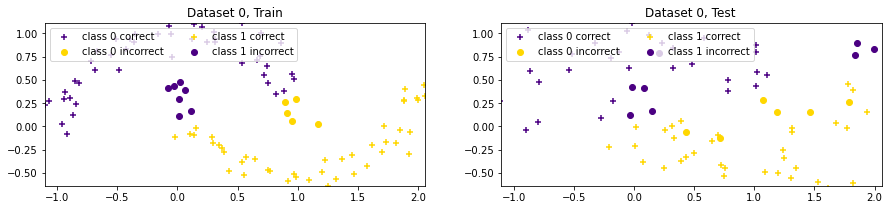

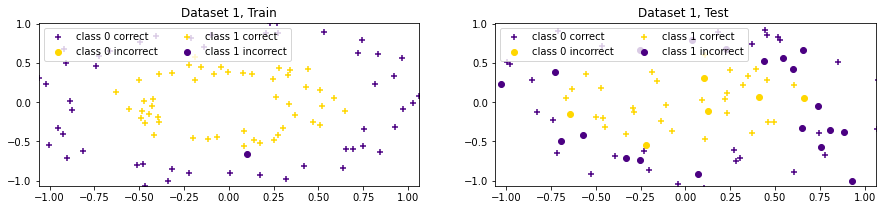

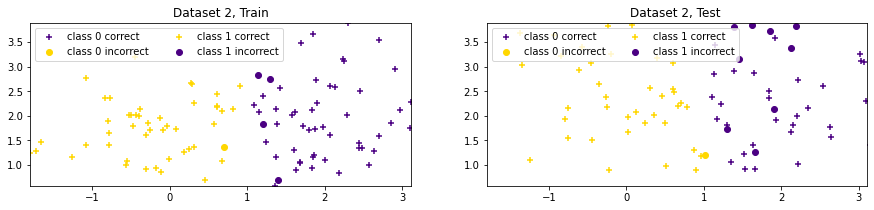

In [31]:
for i, (ds_train, ds_test) in enumerate(zip(datasets_train, datasets_test)):
    ds_train = datasets_train[i]
    ds_test = datasets_test[i]

    X = ds_train[0]
    Y = ds_train[1]
    
        
    X_test = ds_test[0]
    Y_test = ds_test[1]
    # 1) train model
    prior_dict, class_summaries = train_NB(X,Y)
    
    # 2) Predict 
    # a) for test data
    posterior = test_NB(X_test,class_summaries, prior_dict )
    pred_test = np.argmax(posterior,1)

    # b) for training data
    posterior = test_NB(X, class_summaries, prior_dict )
    pred_train = np.argmax(posterior,1)

    
    #4) plot predictions
    plot_predictions(i,X,Y, X_test, Y_test, pred_train, pred_test)

**Question:** for which datasets did the naive Bayes classifier perform well? Describe in your own words why this is the case. Why did the Naive Bayes classifier work so badly for the first dataset?

Of course sklearn package offers an implementation of the Naive Bayes classifier. Lets try it out.

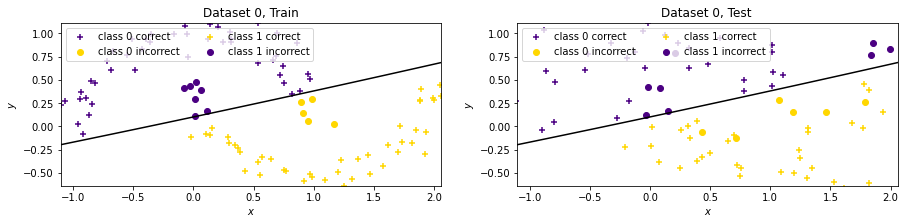

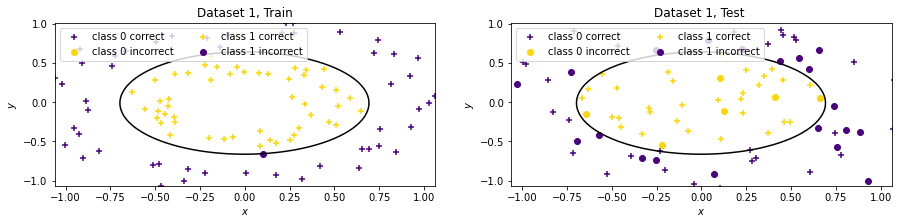

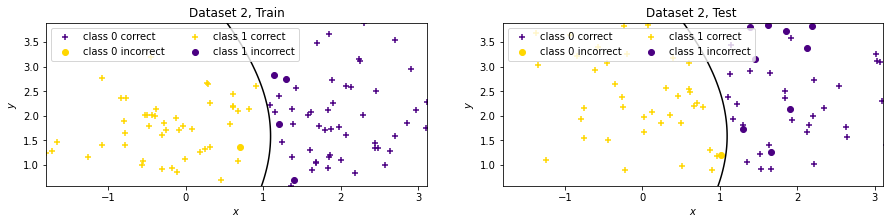

In [32]:
from sklearn.naive_bayes import GaussianNB

for i, (ds_train, ds_test) in enumerate(zip(datasets_train, datasets_test)):
    ds_train = datasets_train[i]
    ds_test = datasets_test[i]

    X = ds_train[0]
    Y = ds_train[1]
    
        
    X_test = ds_test[0]
    Y_test = ds_test[1]
    # 1) train weights
    model = GaussianNB()
    #lets fit the model (learn its parameters)
    model.fit(X, Y)

    # 2) Calculate the discriminant function and predict 
    # a) for test data
    pred_test = model.predict(X_test)

    # b) for training data
    y_x = np.dot(W.T, X_b.T)
    pred_train = model.predict(X)

    
    # 4) plot predictions
    plot_predictions(i,X,Y, X_test, Y_test, pred_train, pred_test,  plot_nb=model )

### 2.2. Example of Naive Bayes for text classification.

Now that we have understood how Naive Bayes works, lets walk through a text classification example taken from the  exercises notebook accompanying the 'Python Data Science Handbook' [book](https://www.oreilly.com/library/view/python-data-science/9781491912126/).

Lets now apply naive bayes classifier to the text classification task. As discussed in class, in text classification the features are related to word counts or frequencies within the documents to be classified.

Lets download the  20 Newsgroups corpus and take a look at some target names.

In [33]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [34]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is an example exntry from the data:

In [35]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Lets convert the content of each string into a vector of numbers using the [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) vectorizer and create a pipeline that attaches it to a multinomial naive Bayes classifier.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

We can now fir the model on the training data and predict the labels for the unseen test data.

In [37]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Lets evaluate the performance of our learned classifier using a [confussion matrix](https://en.wikipedia.org/wiki/Confusion_matrix):

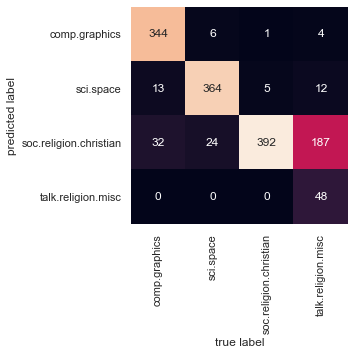

In [38]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As we can see, this simple classifier is able to relatively well seperate the space talk from the computer talk, but it gets confused between talks about religion and Chrisitanity.

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [39]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [40]:
predict_category('sending a payload to the ISS')

'sci.space'

In [41]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [42]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.